<a href="https://colab.research.google.com/github/Duongbui001/Twitter-analysis/blob/main/Python-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install emot
!pip install TextBlob
!pip install contractions
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import chart_studio
import re
import string
import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize
!pip install emoji

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
username=''
api_key=''

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

pd.set_option('display.max_colwidth', None)

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

sid = SentimentIntensityAnalyzer()
emot_obj = emot.core.emot()

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

pio.renderers.default = 'colab'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving trump-tweets.csv to trump-tweets.csv


In [ ]:
import pandas as pd
 
df = pd.read_csv("trump-tweets.csv")
df.sample(n=20)

,user_name,text,hashtags
46937,Viral News NY,Yesterday @ManhattanDA Alvin Bragg leaves the downtown Manhattan court house after the #TrumpIndictment was handed down . https://t.co/FqRh2EPKZQ,['TrumpIndictment']
32058,Mrmurdan,"@ErikJetmir Hillary's violation literally cost this country millions in legal fees, pushed our country further apart, and was also election interference. Our legal system is incredibly broken. We need to stand up and oppose this corruption.#TrumpArrest",NaN
10464,Peter James,@rogeralamb 200 wins 19 loses\nI'll stick with Trump\n#Trump2024NowMorethanEver,['Trump2024NowMorethanEver']
3790,Viral News NY,More from the #TrumpArraignment by Downtown Manhattan. I spoke with a man who stated he didn't like Donald Trump. I asked the man why he doesn't like him. Here's what he had to say. \n#Trump #NYC \nFor licensing email viralnewsnyc@gmail.com https://t.co/P5KoNctmD7,['TrumpArraignment']
11199,LORD BELIAL MARDUK BALEM ĒLIL YAHWEH ELOHIM ADONAÏ,HOW ENKI CREATED NEGATIVE RHESUS (O RULING PUPPETS) BLOODLINE.\n#mRNA\n#Google\n#VoteNO\n#Marianne\n#MichaelCera\n#VaccineDeath\n#MarlèneSchiappa\n#Ramadan\n#DonaldTrump\n#Clintons\n#MarALago\n#Trump2024NowMorethanEver\n#Stormy\n#Hilary https://t.co/KnrqFAJFTM,"['mRNA', 'Google', 'VoteNO', 'Marianne', 'MichaelCera']"
22771,✨Ilene✨✡️🟦,"How does MAGA reconcile tRump saying in one breathe that he was allowed to take docs but when Biden does it, it’s illegal. Special kind of stupid, these people. 🙄🥴\n\n#TrumpSpeech #Maralardo #TrumpArraignment",NaN
24617,Venus Throw,"#BREAKING \n#Trump charged with 34 #felony counts of falsifying business records,#conspiracy\nTrump pleaded #NotGuilty to the charges.\nhttps://t.co/G8K0NMVowC\n#KarenMcDougal #StormyDaniels #BreakingNews #ULTIMAHORA #UltimeNotizie #TrumpArraignment #TrumpIndictment #Bragg #NYC","['BREAKING', 'Trump', 'felony', 'conspiracy']"
39129,B. J. Thompson,"Can you count this high, Don? 😎\n#TrumpIndictment https://t.co/KOcZrqsoik",['TrumpIndictment']
23797,Dr. Bruess,America Condensed Soup\nThe Former President\nARRAIGNED\ncreated by Dr. Bruess (Bruce Ashman Baker)\n\nCheck out my NFT on OpenSea! https://t.co/Kqb70Y57MF via @opensea \n\n#DrBruess #opensea #icon #NFT #POPart #Trump #TrumpIndictment #TrumpArrest #TrumpIsDone https://t.co/EV7Z7zQUh4,NaN
14746,Malema_PK,What will affect the market in April? \n\nRead to find out and get helpful ideas to apply in your trading.\n\nYou should be trading by now🤞👊\n\n#dollarcollapse #TrumpArraignment \n#earthquake #NFFC #TrumpArrest #NASDAQ https://t.co/LuUNrq1vU4,NaN


In [ ]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df = df.astype('string') 

print(df['text'].dtypes)



string


In [ ]:
df['processed_text'] = df['text'].apply(pre_process)

In [ ]:
df.sample(n=5)

,user_name,text,hashtags,processed_text
9967,latina4FJB,@SUBRATA30016572 @PaulaJo4GOP LATINAS FOR TRUMP FOREVER. #Trump2024NowMorethanEver https://t.co/rvj4TMTtx4,['Trump2024NowMorethanEver'],latinas for trump forever.
33086,Jarica Davis 🏳️‍🌈 #Betocrat #HumanRights4All,"#TrumpArrest #TrumpPerpWalk “The tranquilizing drug of gradualism” is a poison on democracy. There must be equal justice, for all. #NoOneIsAboveTheLaw https://t.co/gr59NlaYGu","['TrumpArrest', 'TrumpPerpWalk']","“the tranquilizing drug of gradualism” is a poison on democracy. there must be equal justice, for all."
26370,vioulpw44,@joncoopertweets #TrumpIndictment The time of impunity is over.🤔 https://t.co/LOTyP97VNU,['TrumpIndictment'],the time of impunity is over.🤔
336,𝕯.𝕵. 𝕾𝖊𝖒𝖎 𝕽𝖊𝖙𝖎𝖗𝖊𝖉 🚛 🥁,@keriRN @YouTube Let him keep flappin his trap ... I warned him a week ago he didn't have the power to interfere with a state prosecution.. I hope the #ManhattanDA indicts Gym Jordon for his ongoing vendetta against him for the #TrumpIndictment matter. https://t.co/9wmdMOmmvL,NaN,let him keep flappin his trap ... i warned him a week ago he didn't have the power to interfere with a state prosecution.. i hope the indicts gym jordon for his ongoing vendetta against him for the matter.
25145,The Independent,- #TrumpIndictment - Watch: Marjorie Taylor Greene compares Trump to Nelson Mandela and Jesus https://t.co/fjmW5qqSWA,['TrumpIndictment'],- - watch: marjorie taylor greene compares trump to nelson mandela and jesus


In [ ]:
def get_top_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_bigram(df['processed_text'], 30)



In [ ]:
df1 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count',
    linecolor='black',
    title='Top 30 bigrams in Tweets')

In [ ]:
wordnet_lem = WordNetLemmatizer()

df['text_lem'] = df['processed_text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

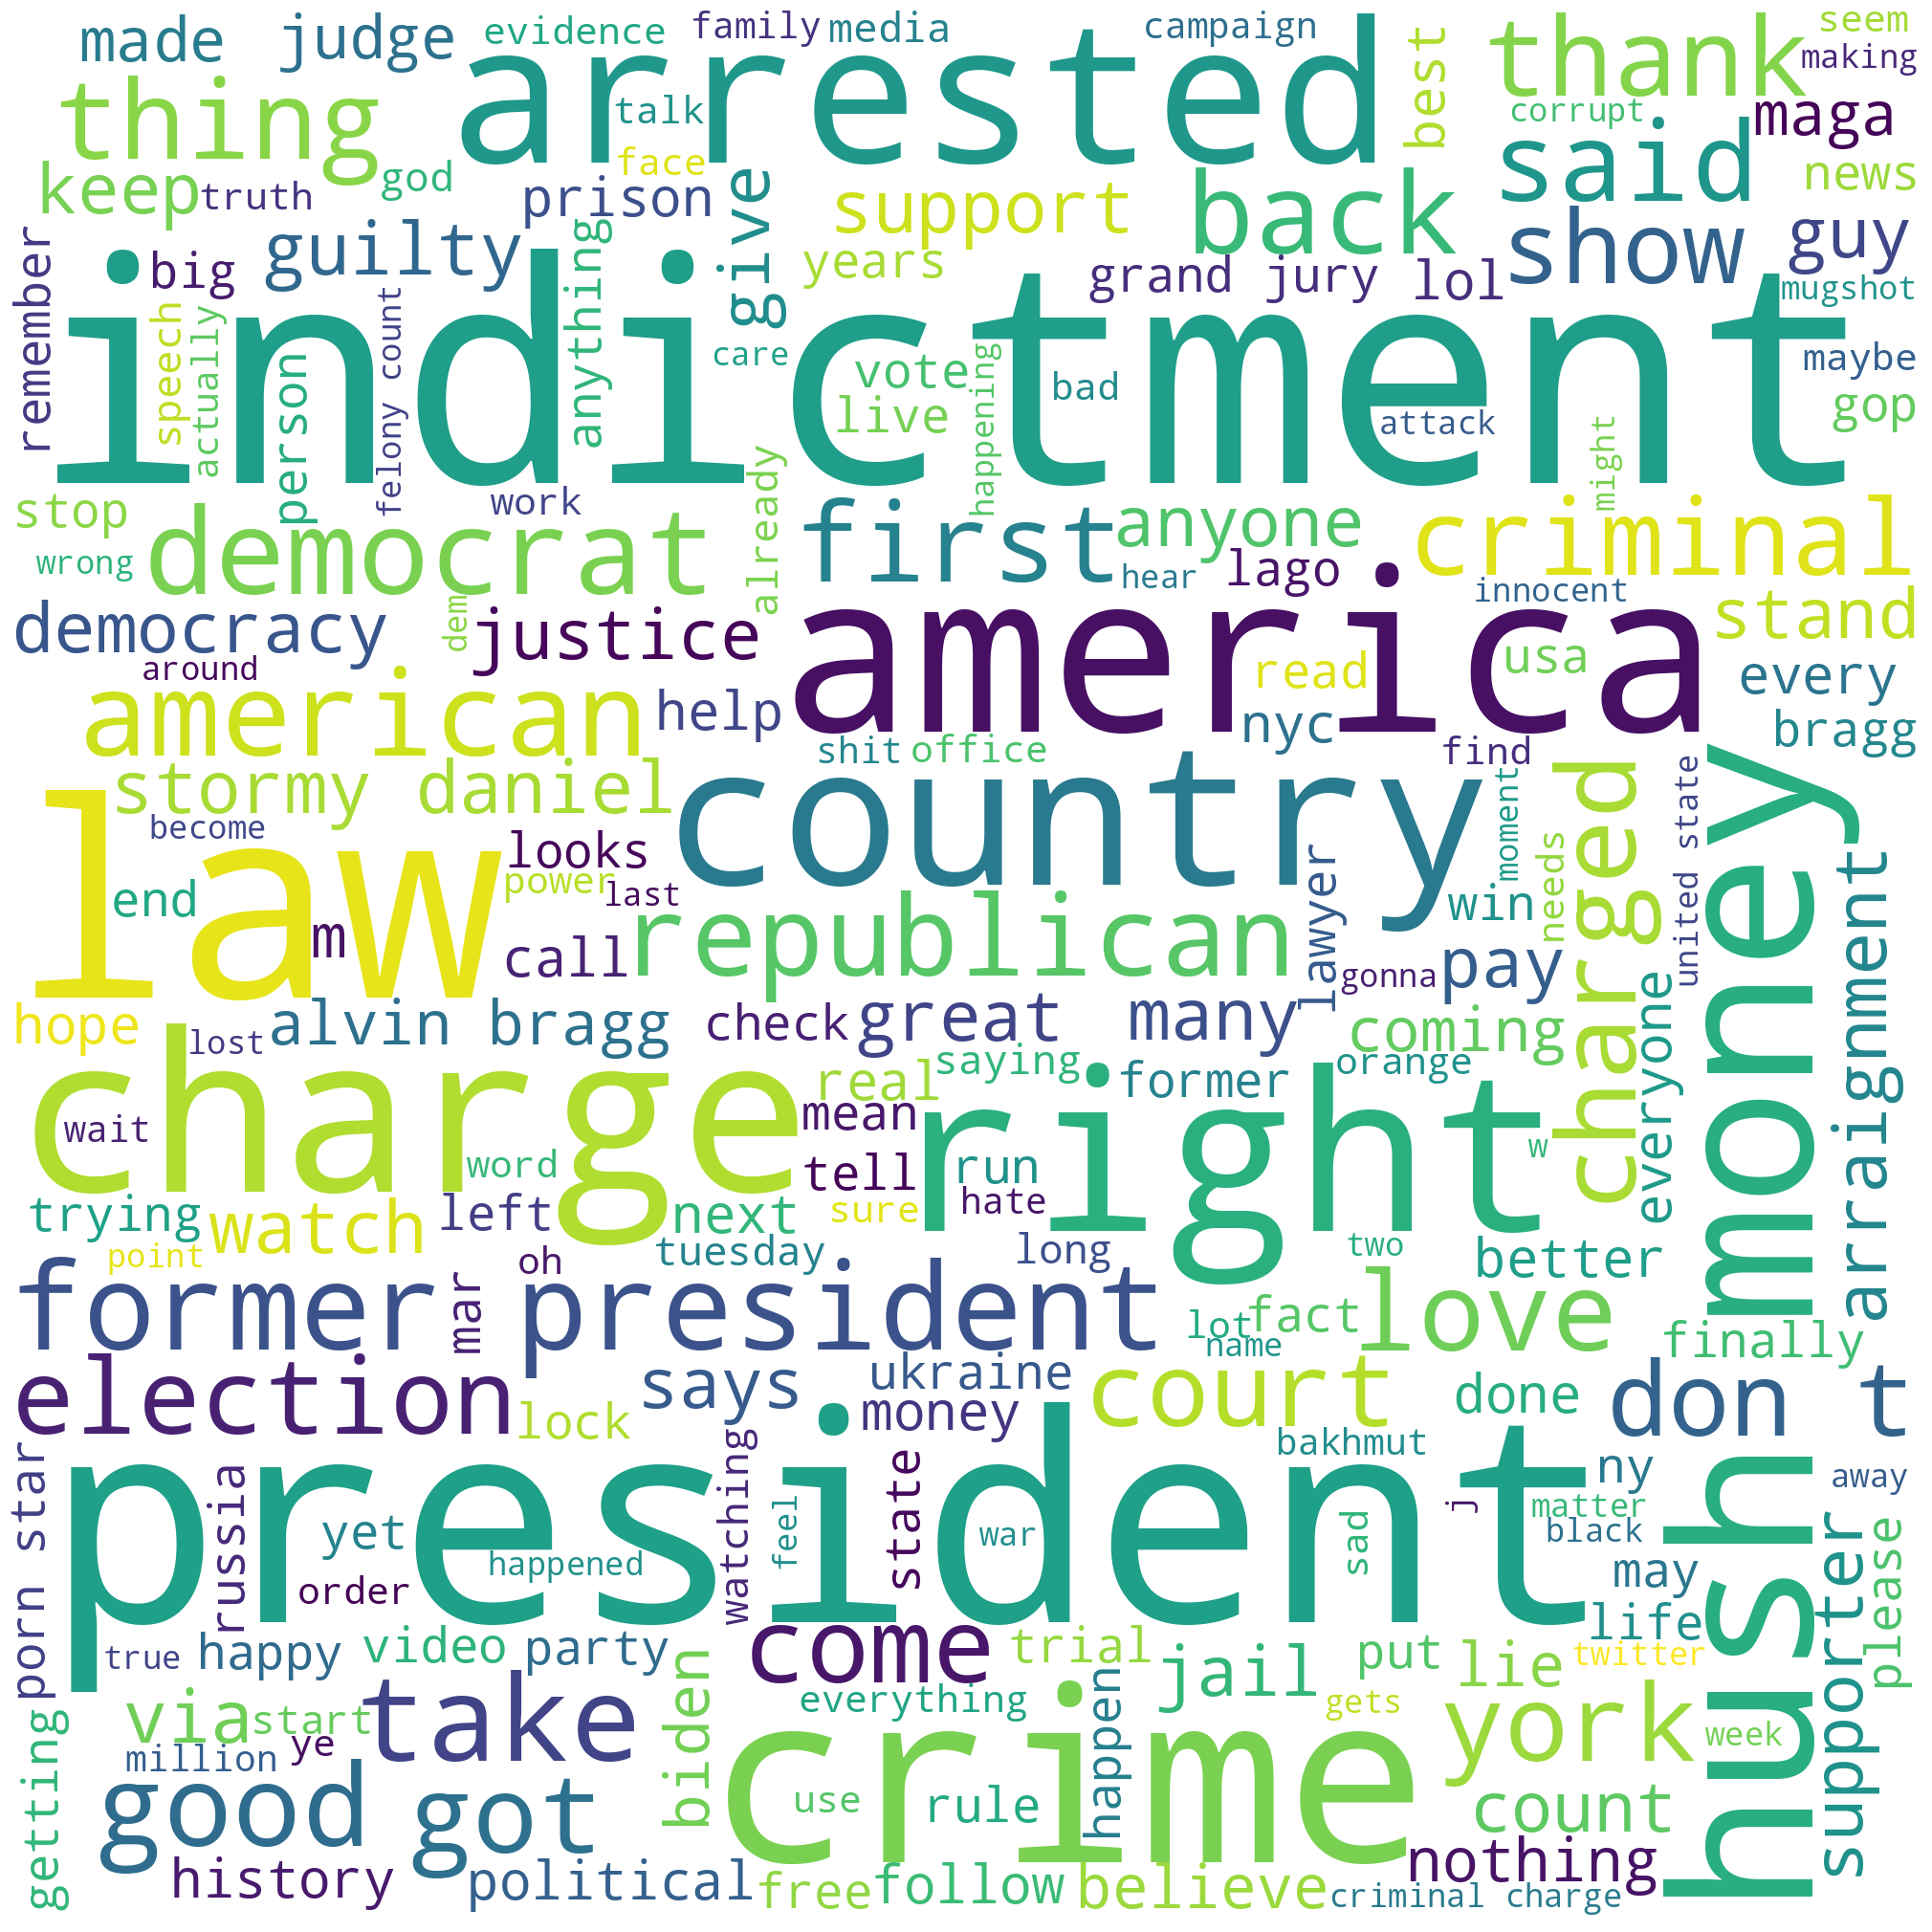

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["thought","case","make","see","trump","go","us","man","always","way","world","indicted","arrest","people","new","want","let","something","never","say","look","think","donald","another","must","hey","know","will","S","re","u","alway","one","don't","think","going","need","much","year","today","well","someone","really","now","still","day","time","even"])

wordcloud_twitter = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords
                              ).generate(all_words_lem)

plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter, interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo.png", format="png")

plt.show()

In [ ]:
# Retrieves all occurrences of @+text
df['mentions'] = df['text'].str.findall(r'@\w+')
# Removes the @ in front
df['mentions'] = [list(map(lambda x: x[1:], mentions)) for mentions in df['mentions']]
# Converts the list of words in each row to a string
df['mentions_string'] = df['mentions'].apply(lambda x: ' '.join(x))
# Concatenates all strings in one string
all_mentions = ' '.join([word for word in df['mentions_string']])

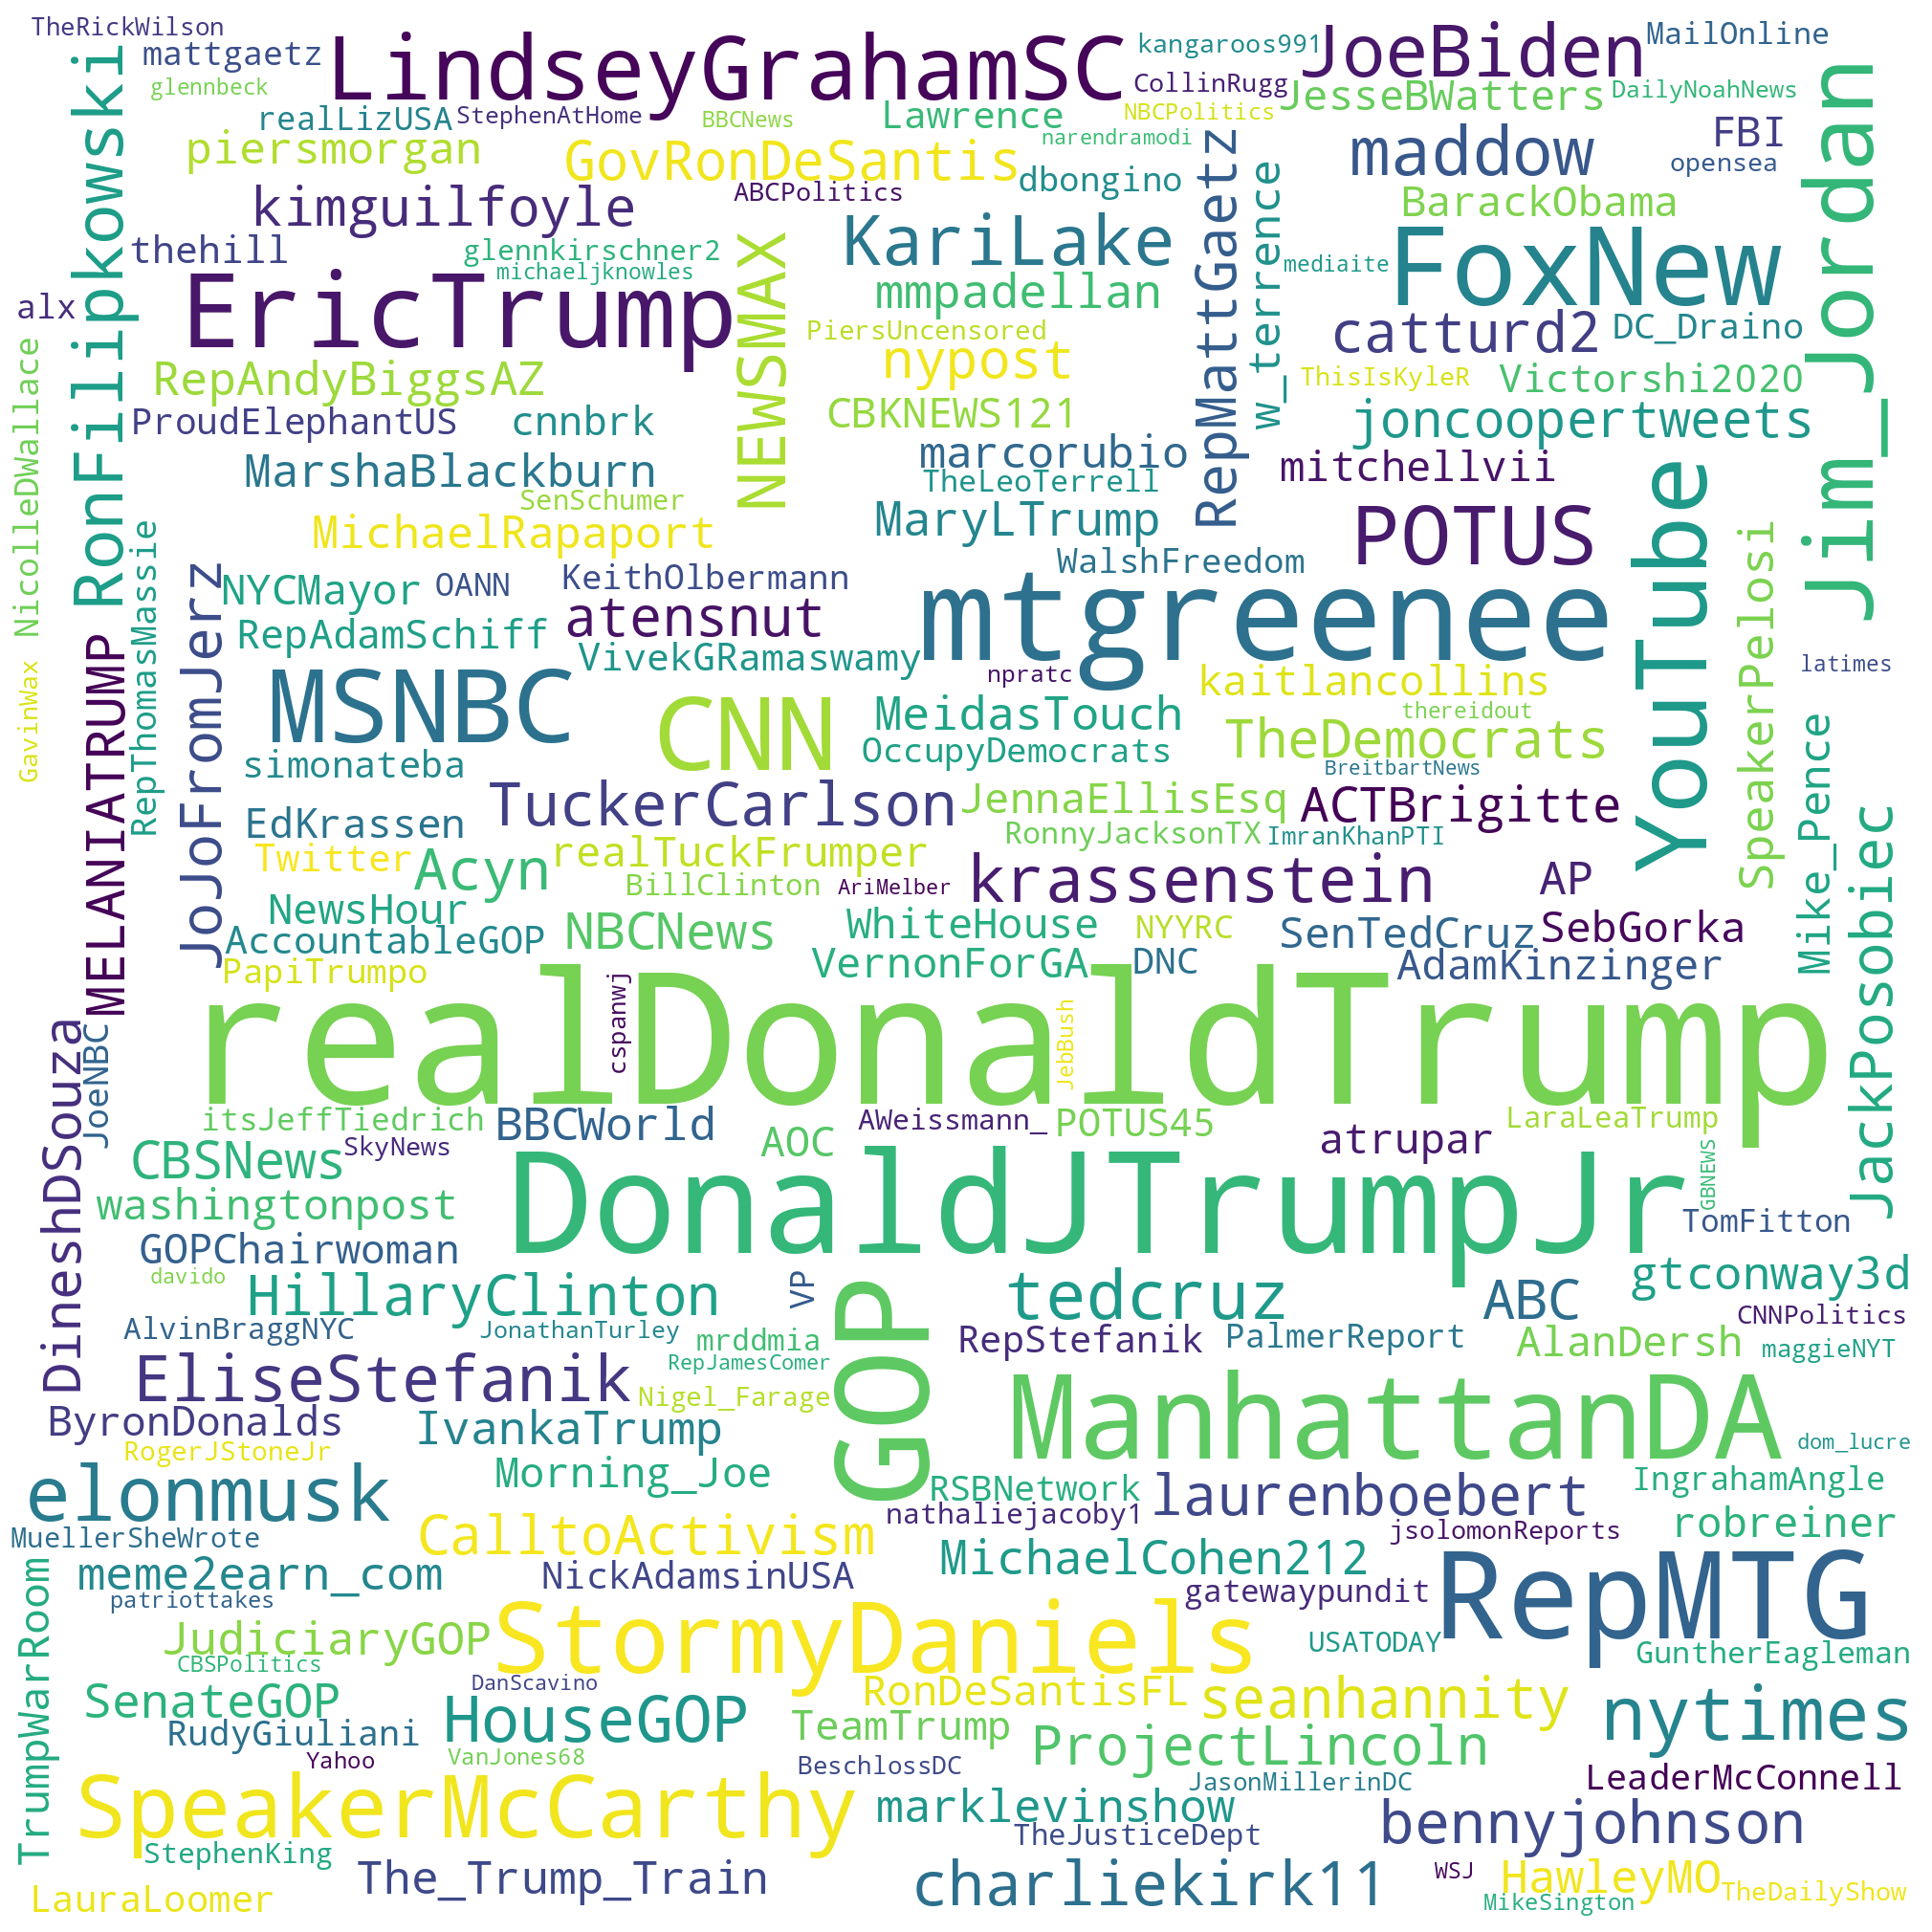

In [ ]:
# Generate a word cloud image
wordcloud_twitter2 = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              collocations = False,
                              ).generate(all_mentions)

plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter2, interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_mentions.png", format="png")

plt.show()

In [ ]:
# Define a function to extract emoticons
def extract_emoticons(text):
  res = emot_obj.emoji(text)
  return res['value']
     

In [ ]:
df['emoticons'] = df['text'].apply(extract_emoticons)



In [ ]:

df.sample(n=10)

,user_name,text,hashtags,processed_text,text_lem,mentions,mentions_string,emoticons
46998,Agolf Twitler Slayer,My favorite meme of the day! Retweet or show me yours! #TrumpIndictment https://t.co/jL6W9Q9BRb,['TrumpIndictment'],my favorite meme of the day! retweet or show me yours!,my favorite meme of the day! retweet or show me yours!,[],,[]
23435,WordsOfWisdom,"We do not quit playing because we grow old, we grow old because we quit playing. - Oliver Wendell Holmes Jr. #TrumpArraignment #LaFirmaNetflix #earthquake #CHELIV #DRWFirstGoal https://t.co/RXvmeRrspk",NaN,"we do not quit playing because we grow old, we grow old because we quit playing. - oliver wendell holmes jr.","we do not quit playing because we grow old, we grow old because we quit playing. - oliver wendell holmes jr.",[],,[]
28475,Howard H. Lee,Crowing out #OPECProductionCuts by $WWE @CNBC #TrumpIndictment @BloombergRadio https://t.co/2wuKbA67Tc,"['OPECProductionCuts', 'TrumpIndictment']",crowing out by $wwe,crowing out by $wwe,"[CNBC, BloombergRadio]",CNBC BloombergRadio,[]
4538,⍟♡Ɠя3тє♡⍟,We all agree 👍 #Trump #TrumpIndictment #TrumpIsACriminal #TrumpForPrison #GretiansTag #indictment #TrumpIndicted #LockHimUp https://t.co/EX5HabsX35,"['Trump', 'TrumpIndictment', 'TrumpIsACriminal', 'TrumpForPrison', 'GretiansTag', 'indictment', 'TrumpIndicted']",we all agree 👍,we all agree 👍,[],,[👍]
39700,Trump Indictment,Has Rudy said anything about the Trump Indictment? I'm one of his best friends. #RudyGiulianiBlockedMe #TrumpIndictment https://t.co/XfbHTXMUfx,['RudyGiulianiBlockedMe'],has rudy said anything about the trump indictment? i'm one of his best friends.,has rudy said anything about the trump indictment? i'm one of his best friends.,[],,[]
14439,Winning Fam. Green tickets only,*THERE ARE MANY MEMBERS OF THIS PLATFORM WHO HAS REFUSED TO TESTIFY AFTER WINNING* *MEMBERS WHO DO NOT APPRECIATE THE GUARANTEED GEMES THEY ARE BENEFITING FROM THE PLATFORM I KNOW THEM ALL #DOGE #TrumpArrest #TrumpArraignment https://t.co/UhK7NxBHSx,NaN,*there are many members of this platform who has refused to testify after winning* *members who do not appreciate the guaranteed gemes they are benefiting from the platform i know them all,*there are many members of this platform who has refused to testify after winning* *members who do not appreciate the guaranteed gemes they are benefiting from the platform i know them all,[],,[]
14529,Graeme,"The @BorisJohnson loyalists rallying around @realDonaldTrump...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail #TrumpArrest https://t.co/FiyVtKuiks",NaN,"the loyalists rallying around ...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail","the loyalists rallying around ...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail","[BorisJohnson, realDonaldTrump]",BorisJohnson realDonaldTrump,[]
32982,Shelby Varney 𝝅,The pieces move across the board. #TrumpIndicment #TrumpArrest #Maga #TRUMP2024 https://t.co/idJrxH7Rtx,"['TrumpIndicment', 'TrumpArrest', 'Maga', 'TRUMP2024']",the pieces move across the board.,the pieces move across the board.,[],,[]
34718,Sci-Dem🇪🇺🇺🇦😷💉🌍🌱,That FACE 🤣😂😂😂😂 #TrumpArrest #TrumpIndicment #Trump https://t.co/VRpLq2KCJe,"['TrumpArrest', 'TrumpIndicment', 'Trump']",that face 🤣😂😂😂😂,that face 🤣😂😂😂😂,[],,"[🤣, 😂, 😂, 😂, 😂]"
43036,Tiv,Crucify the man who revealed their sin and release the criminal. Has anything changed since Biblical times? Matt 27:15-22 #TrumpArrest,['TrumpArrest'],crucify the man who revealed their sin and release the criminal. has anything changed since biblical times? matt 27:15-22,crucify the man who revealed their sin and release the criminal. has anything changed since biblical times? matt 27:15-22,[],,[]


In [ ]:
df['emoticons'].apply(lambda x: collections.Counter(x))
combined_counts = sum(df['emoticons'].apply(lambda x: collections.Counter(x)), collections.Counter())
emoji_dict = dict(combined_counts)
sorted_emoji_dict = dict(sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True))
     

In [ ]:
d = {k: v for i, (k, v) in enumerate(sorted_emoji_dict.items()) if i < 30}
df_emojis = pd.DataFrame(list(d.items()), columns=['Emojis', 'Count'])
df_emojis.at[5, 'Emojis'] = '❤️'
df_emojis.at[6, 'Emojis'] = '🤡'

In [ ]:
df_emojis.groupby('Emojis').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle='Emojis', yTitle='Count', linecolor='black', title='The 30 most used emojis')
     


In [ ]:
df['vader_polarity'] = df['processed_text'].map(lambda text: sid.polarity_scores(text)['compound'])


In [ ]:
new_df = df['vader_polarity']

In [ ]:
new_df.iplot(
    kind='hist',
    bins=50,
    xTitle='← Negative — — — — — — Positive →',
    linecolor='black',
    yTitle='Count',
    title='Distribution of sentimental polarities',
    colors = ['blue'],
    barmode="group")
     


In [ ]:
new_df.describe()

count    52714.000000
mean        -0.035804
std          0.483057
min         -0.993200
25%         -0.440400
50%          0.000000
75%          0.361200
max          0.986900
Name: vader_polarity, dtype: float64

In [ ]:
df['sentiment_type']=''
df.loc[new_df>0,'sentiment_type']='POSITIVE'
df.loc[new_df==0,'sentiment_type']='NEUTRAL'
df.loc[new_df<0,'sentiment_type']='NEGATIVE'

<Axes: title={'center': 'Sentiment analysis - Vader'}, xlabel='Polarity', ylabel='counts'>

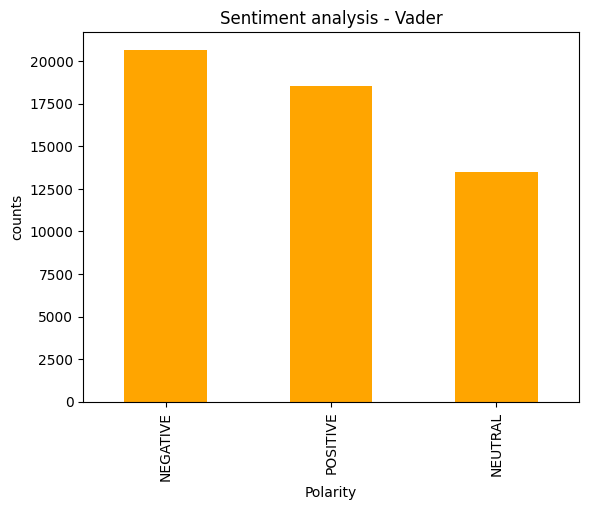

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="Sentiment analysis - Vader",xlabel="Polarity",ylabel="counts", color="orange")

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['stop_text'] = df['processed_text'].apply(lambda x: remove_stop_words(x))

In [ ]:
topics = ['donald trump',
          'hush money',
          'stormy daniels',
          '34 felony', 
          'trump indictment',
          'alvin bragg',
          'grand jury',
          'rule law',
          'porn star',
          'mar lago'
          ]

vader_sentiments = df['vader_polarity'].tolist()
text = df['stop_text'].tolist()

df['Topic'] = ""
for topic in topics:
    df.loc[df['stop_text'].str.contains(topic), 'Topic'] = topic

data = []
for topic in topics:
    topic_rows = df[df['Topic'] == topic]
    
    vader_sentiments = topic_rows['vader_polarity'].sum() / topic_rows.shape[0]

    data.append({'Topic': topic, 'Sentiment': vader_sentiments, 'Source': 'Vader'})

df_new = pd.DataFrame(data)

# Plot the sentiment for each topic
fig = px.bar(df_new,
             x='Topic',
             y='Sentiment',
             labels={"Topic": "Topic",
                     "Sentiment": "← Negative — — — — — — — — — — — — — Positive →",
                 },
             color='Source',
             title='Sentiment analysis by topic',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black",
                  marker_color='green')

fig.show()

In [ ]:
usernames = ['@ManhattanDA', '@RepMTG', '@realDonaldTrump' , '@SpeakerMcCarthy', '@GOP','@CNN','@StormyDaniels','@FoxNew','@DonaldJTrumpJr','@Jim_Jordan']
vader_sentiments = df['vader_polarity'].tolist()
text = df['text'].tolist()

# create a new column for the username
df['Mention'] = ""
for username in usernames:
    df.loc[df['text'].str.contains(username), 'Mention'] = username

# create a new dataframe with columns for username, sentiment, and sentiment source
data = []
for username in usernames:
    username_rows = df[df['Mention'] == username]
    vader_sentiments = username_rows['vader_polarity'].sum() / username_rows.shape[0]
    data.append({'Mention': username, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
df_new = pd.DataFrame(data)

# plot the sentiment for each username using Plotly
fig = px.bar(df_new,
             x='Mention',
             y='Sentiment',
             labels={"Mention": "Mention",
                     "Sentiment": "← Negative — — — — — — — Positive →"},
             color='Source',
             title='Sentiment analysis by @account',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black",
                  marker_color='blue')

fig.show()
     